In [1]:
from pylab import *
%matplotlib inline

/home/maunio/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
def Metodo_Euler(x_0, y_0, funcion, x, h=0.1):
    
    tiempos = arange(x_0, x + h, h)
    y = [0]*len(tiempos)
    y[0] = y_0
    
    for i in range(len(y)-1):
        y[i+1]= y[i] + funcion(tiempos[i],y[i])*h
    
    solucion = [tiempos, y]
    
    return solucion

In [3]:
def mi_ec_diff_od2(x, y):
    return array([y[1],-y[0]])

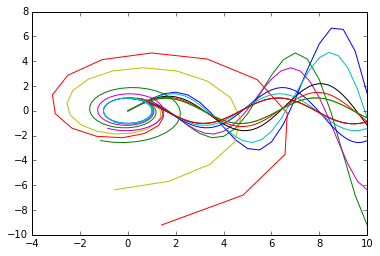

In [26]:
hs = [0.5, 0.4, 0.2, 0.1, 0.01, 0.01]

for i in hs:
    sol = Metodo_Euler(0., array([0., 1.]), mi_ec_diff_od2, 10., i)
    #plot(sol[0], sol[1][*][0]) Cuando se ponen arrays la segunda coordenada no dice el renglon y la tercera
                              # representa las columnas internas de cada elemento del arreglo.
    
    image = [0]*len(sol[0])
    deriva = [0]*len(sol[0])
    
    for i in range(len(sol[0])):
        image[i] = sol[1][i][0] 
        deriva[i] = sol[1][i][1]
        
    plot(sol[0], image)
    plot(sol[0], deriva)
    plot(image, deriva)
    
show()

In [27]:
def mi_factorial(n):
    f = 1
    num = range(2, n+1)
    for i in num:
        f = f*i
    return f

In [30]:
def mi_sine(x,n_max):
    x = x%(2*pi)
    y = 0.
    if x<= (pi/2):
        #print "intervalo 1"
        x = x
    elif (pi/2)< x <= pi:
        #print "intervalo 2"
        x= pi-x
    elif (pi)< x <= (3*pi/2):
        #print "intervalo 3"
        x= pi-x
    else:
        #print "intervalo 4"
        x= x-2*pi
    
    for n in range(n_max):
        p = 2*n + 1
        y = y + ((-1)**n)*(x**(p)/mi_factorial(p))
    err_abs = abs(x**(p+2))/mi_factorial(p+2)
    return y, err_abs

In [33]:
for n in range(1,15):
    print "n =", n, " ", mi_sine(pi/2, n)

n = 1   (1.5707963267948966, 0.6459640975062462)
n = 2   (0.9248322292886504, 0.07969262624616703)
n = 3   (1.0045248555348174, 0.004681754135318687)
n = 4   (0.9998431013994987, 0.00016044118478735975)
n = 5   (1.0000035425842861, 3.598843235212084e-06)
n = 6   (0.999999943741051, 5.692172921967924e-08)
n = 7   (1.0000000006627803, 6.688035109811464e-10)
n = 8   (0.9999999999939768, 6.066935731106192e-12)
n = 9   (1.0000000000000437, 4.377065467313739e-14)
n = 10   (1.0, 2.571422892860472e-16)
n = 11   (1.0000000000000002, 1.2538995405354564e-18)
n = 12   (1.0000000000000002, 5.156455176580277e-21)
n = 13   (1.0000000000000002, 1.8123993128488855e-23)
n = 14   (1.0000000000000002, 5.507285786522379e-26)


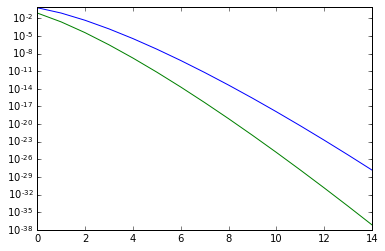

In [42]:
Error = zeros(15)
Error2 = zeros(15)
for i in range(1, len(Error) + 1):
    Error[i-1] = mi_sine(pi/2, i)[1]
    Error2[i-1] = mi_sine(pi/4, i)[1]
plot(Error)
plot(Error2)
yscale('log')
show()

In [43]:
%timeit mi_sine(pi/4, 6)

100000 loops, best of 3: 13.3 µs per loop


In [44]:
%timeit mi_sine(pi/2, 6)

100000 loops, best of 3: 13.4 µs per loop
